Цель исследования:
1. Выявить самые популярные жанры игр и платформы для них
2. Понять какие самые популярные жанры игр и платформы, у регионов.
3. Проверить гипотезы

План Работы: 
Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv.

Шаг 2. Подготовить данные
Заменить названия столбцов (приведите к нижнему регистру);
Преобразовать данные в нужные типы. 
Обработать пропуски.
Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Шаг 3. Исследовательский анализ данных
Шаг 4. Составить портрет пользователя каждого региона
Определить для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5).
Самые популярные жанры (топ-5).
Рейтинг ESRB

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


# 1 загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import scipy.stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Не везде правильные типы данных, название столбцов надо привести к нижнему регистру, много где есть пропуски.

# 2 подготовка данных

In [5]:
data.columns = map(str.lower, data.columns)

Привели название столбцов к нижнему регистру

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')

изменили тип данных у столбца user_score на float

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int32')

Изменили тип данных year_of_release на int

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

name и genre имеют всего по 2 пропуска. Смысла их заменять/удалять нет, оставим ,как есть
year_of_release - при предосмотре данных (методом describe) мы увидели, что год выпуска находится между 1980 и 2016. Но заменять средний или медианным значением мы не можем. Так как у нас к определенному году привяжется 269 дополнительных игр, что отразится, на дальнейшем анализе и он будет недостоверным. Оставим ,как есть.
critic_score,user_score - это оценочные показатели. Здесь мы тоже не можем заменять пропуски средним или медианным значеним. Так же нельзя заменить пропуски нулями (оценка "0" тоже бывает). Оставим, как есть.

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

Аббревиатура TBD имеет несколько расшифровок. Нас же интересует игровая сфера. 'To Be Determined' - 'Будет определено'. Т.е. это то же самое, что неизвестное значение. Поэтому, можно смело заменить значение 'tbd' на 'NaN'.

In [15]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [17]:
data['sales_sum'] = data[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']].sum(axis=1)

In [18]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Вывод:
Исправили название столбцов, проверили на пропуски в данных, заменили пропуски там где посчитали нужным, добавили стобцев с суммой продаж

# 3 исследовательский анализ данных

# 3.1

In [19]:
data_year_of_release = data.pivot_table(index=['year_of_release'], values=['name'], aggfunc='count')

Text(0, 0.5, 'Количество выпущенных игр')

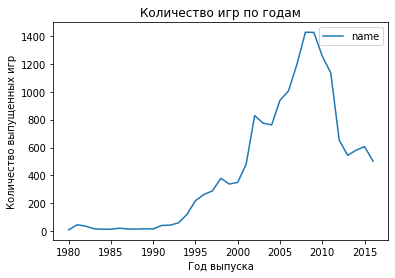

In [20]:
data_year_of_release.plot()
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")

Из графика видно, что с начала 90-х годов количество игр начинает ежегодно расти быстрыми темпоми.Постепенно набирали популярность игровые приставки, такие как Nintendo, Playstation, позже XBOX. Данный рост продолжается до 2008 года.

Сколько игр выпускалось в разные годы

In [21]:
data_platform = data.pivot_table(index=['platform'], values=['sales_sum'], aggfunc='sum')

In [22]:
data_platform.sort_values(by='sales_sum',ascending=False)

,sales_sum
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Отсортировали самые прибыльные игры за все время

# 3.2

In [23]:
data_platform_top_5 = data_platform.sort_values(by='sales_sum',ascending=False).head(5)

In [24]:
data_platform_top_5 = list(data_platform_top_5.index[0:5])
data_platform_top_5

['PS2', 'X360', 'PS3', 'Wii', 'DS']

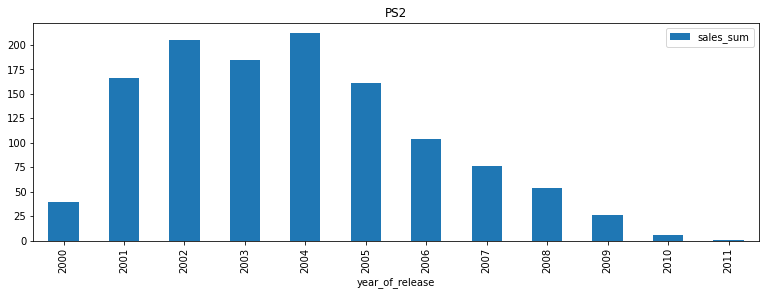

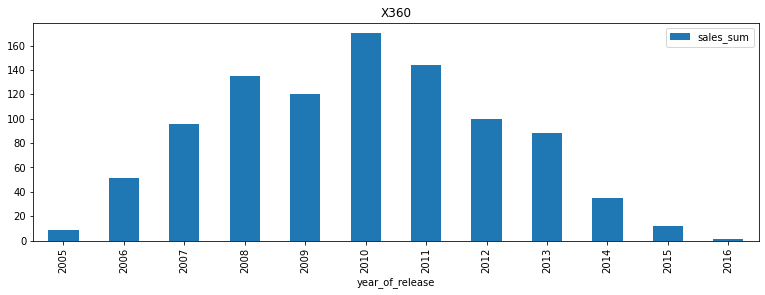

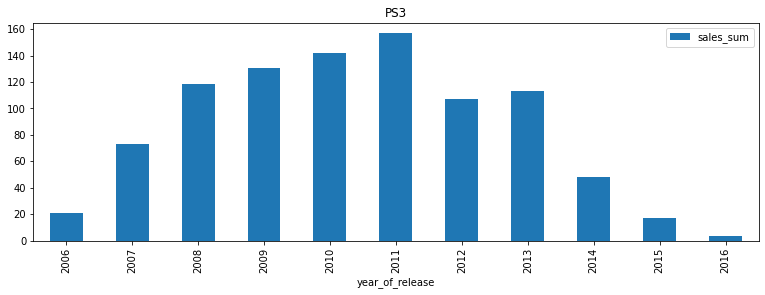

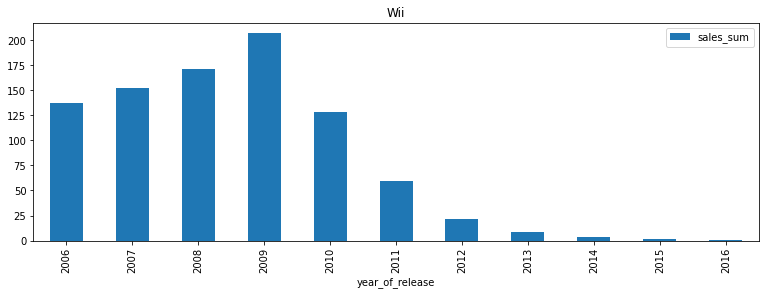

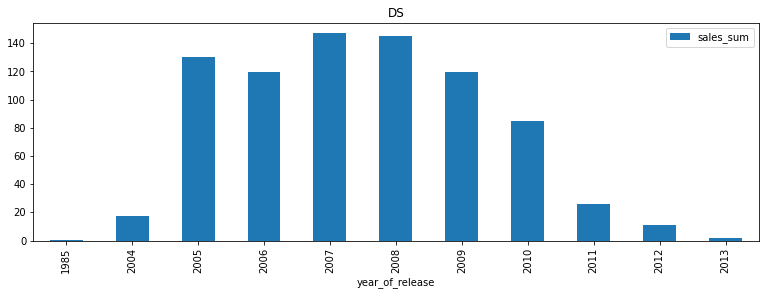

In [25]:
for platform in data_platform_top_5:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

Средний уровень жизни платформ состовляет около 8 лет, можно понять по графикам когда выходит более новая или более доступная модель. 

In [26]:
data_2012 = data[data['year_of_release'] > 2012]
data_2012

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Выбран период с 2012 года, так как большиство новых и страхы моделей сходились именно в этот промежуток врмени
Старые модели платформ теряли интерес , и в это время новые модели как раз становились новыми лидерами продаж

# 3.3

In [27]:
list_2012 = data_2012['platform'].unique()

In [28]:
data_2012.pivot_table(index=['platform'], values=['sales_sum'], aggfunc='sum')


,sales_sum
platform,
3DS,143.25
DS,1.54
PC,39.43
PS3,181.43
PS4,314.14
PSP,3.50
PSV,32.99
Wii,13.66
WiiU,64.63


In [29]:
list_of_top_6 = ['ps4','xone','pc','wiiu','3ds', 'psv']
games_top_6_platforms = data_2012[data_2012['platform'].isin(['ps4','xone','pc','wiiu','3ds', 'psv'])]
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['sales_sum']<1.4]


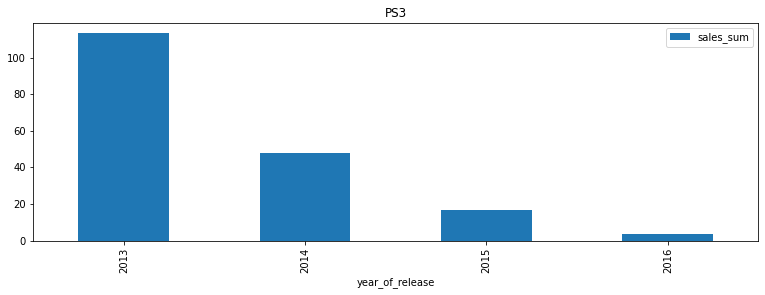

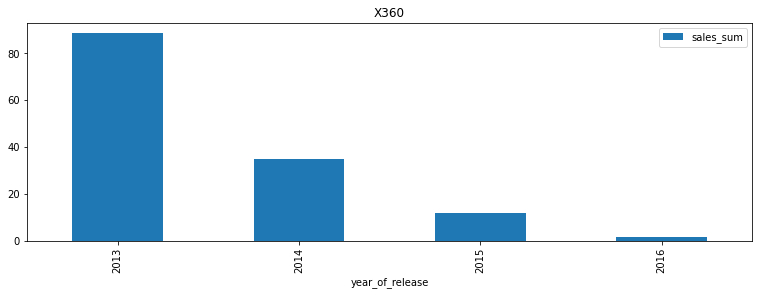

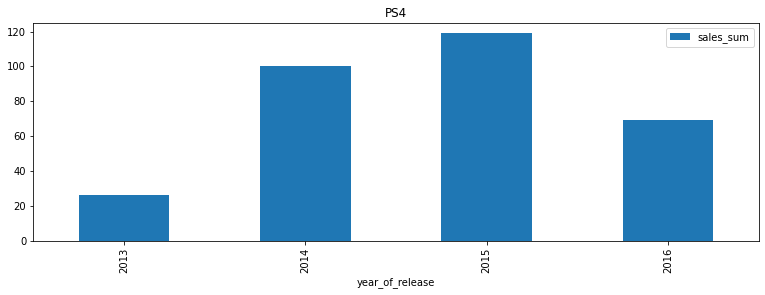

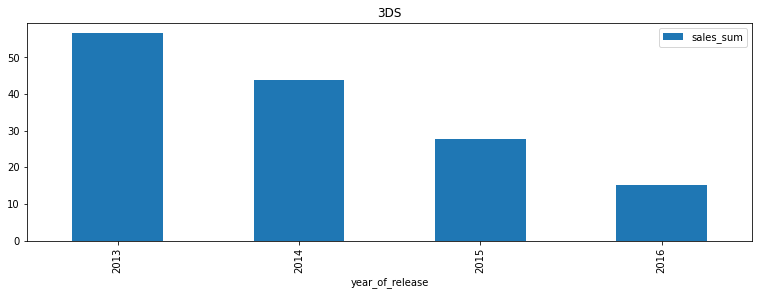

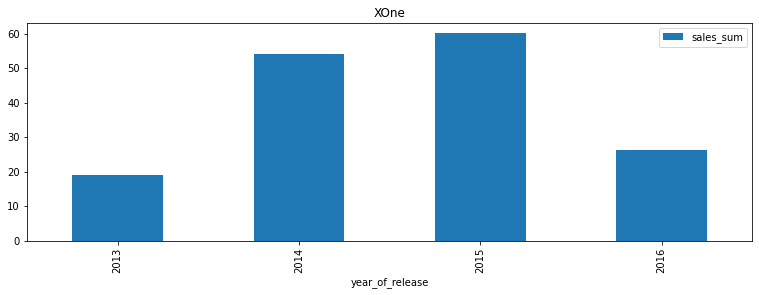

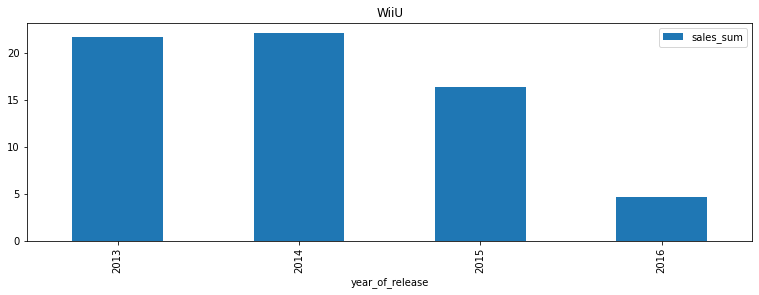

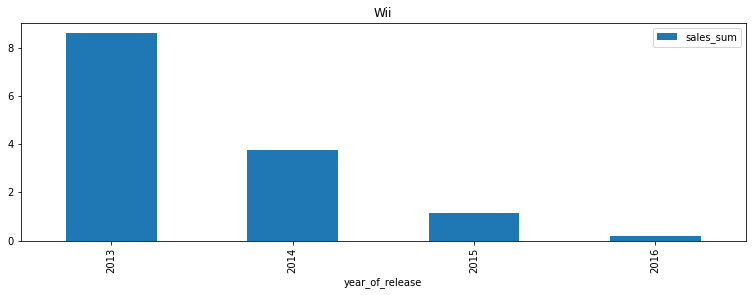

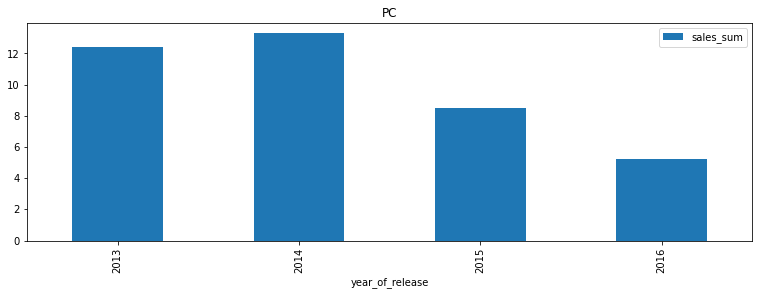

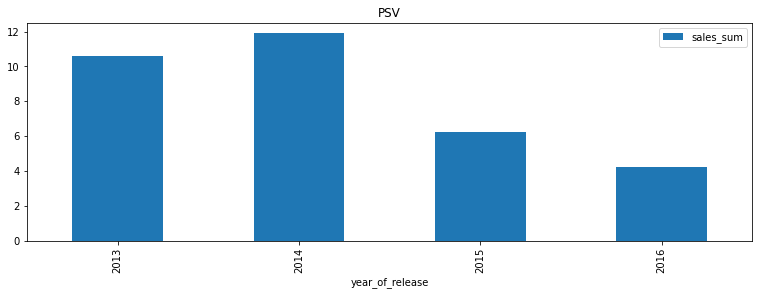

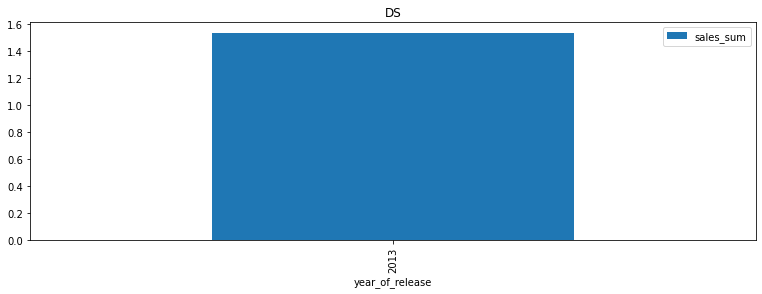

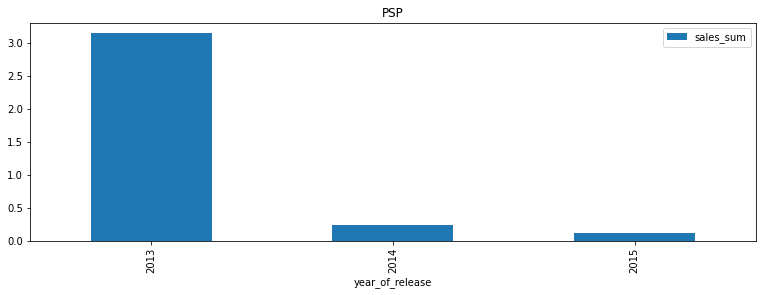

In [30]:
for platform in list_2012:
    data_2012[data_2012['platform'] == platform].pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

По этим графикам можно сделать вывод, что в 2017 году все еще будут акутульаны следующие модели: PS4 придет на смену ps3, 3DS,XOne придет на смену X360, WiiU,PC,PSV. Все эти модели вышли не так давно и тока будут набирать свою аудиторию в игровом мире 

# 3.4

In [31]:
data_2012.pivot_table(index='platform',values='sales_sum',aggfunc='sum').sort_values(by='sales_sum',ascending=False)


,sales_sum
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


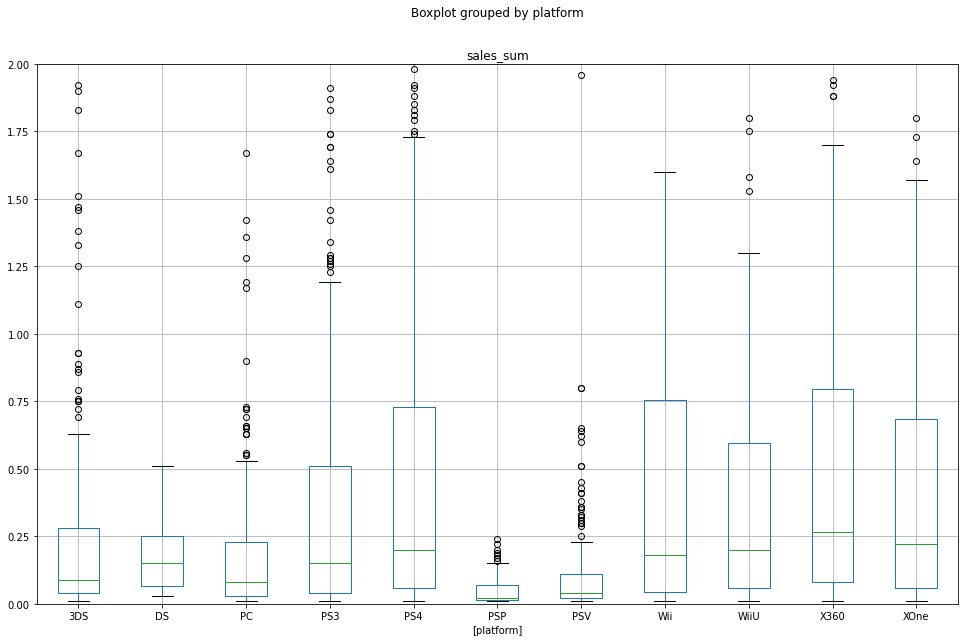

In [32]:
data_2012.boxplot(column=['sales_sum'],by=['platform'],figsize=(16, 10))
plt.ylim([0, 2])
plt.show()

In [33]:
data2 = data_2012.loc[data_2012['platform'].isin(['PS4','XOne','PC','WiiU','3DS', 'PSV'])]

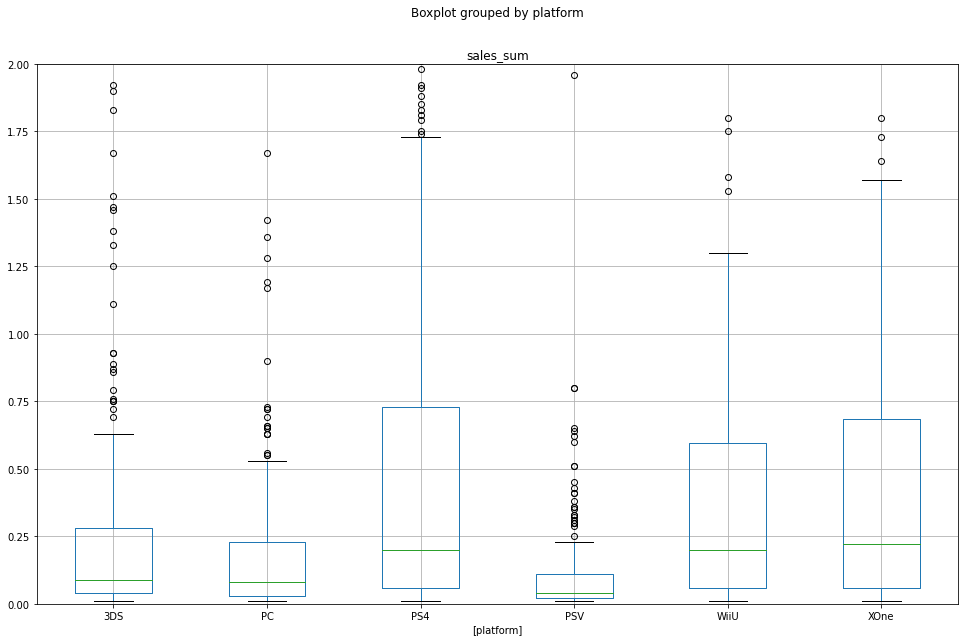

In [34]:
data2.boxplot(column=['sales_sum'],by=['platform'],figsize=(16, 10))
plt.ylim([0, 2])
plt.show()

Исходя из графиков видно, что медиана протекает у всех по разному.
Самая низкая медиана из топ 6 у PSV,у PC и 3DS находятся относительно на одном уровне. Выделяются PS4,WiiU и XOne!

# 3.5

как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

In [35]:
data_ps4 = data.query('platform == "PS4"')

In [36]:
data_x1 = data.query('platform == "XOne"')

<AxesSubplot:xlabel='user_score', ylabel='sales_sum'>

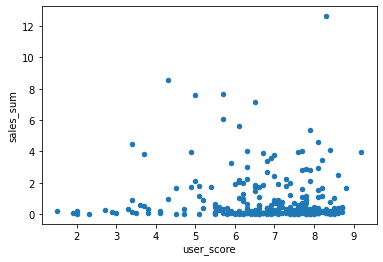

In [37]:
data_ps4.plot(x='user_score',y='sales_sum',kind='scatter')

<AxesSubplot:xlabel='user_score', ylabel='sales_sum'>

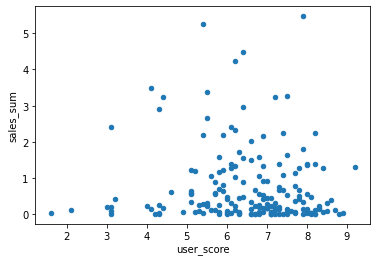

In [38]:
data_x1.plot(x='user_score',y='sales_sum',kind='scatter')

In [39]:
data_ps4['user_score'].corr(data_ps4['sales_sum'])

-0.03195711020455639

In [40]:
data_x1['user_score'].corr(data_x1['sales_sum'])

-0.06892505328279414

<AxesSubplot:xlabel='critic_score', ylabel='sales_sum'>

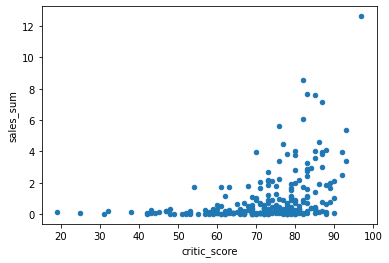

In [41]:
data_ps4.plot(x='critic_score',y='sales_sum',kind='scatter')

<AxesSubplot:xlabel='critic_score', ylabel='sales_sum'>

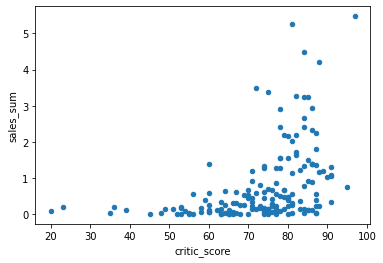

In [42]:
data_x1.plot(x='critic_score',y='sales_sum',kind='scatter')

In [43]:
data_ps4['critic_score'].corr(data_ps4['sales_sum'])

0.40656790206178095

In [44]:
data_x1['critic_score'].corr(data_x1['sales_sum'])

0.41699832800840186

вывод: оценки пользователей не влияют на продажи игр, а вот оценки критиков чуть улучшают ситуацию, но о прямой зависимости говорить нельзя.

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

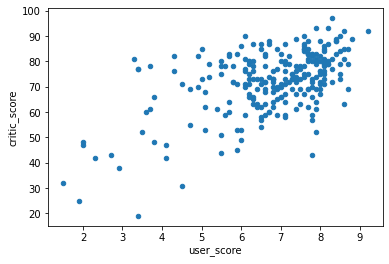

In [45]:
data_ps4.plot(x='user_score',y='critic_score',kind='scatter')

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

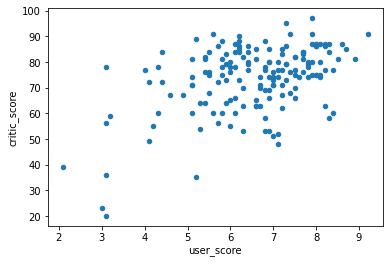

In [46]:
data_x1.plot(x='user_score',y='critic_score',kind='scatter')

In [47]:
data_ps4['user_score'].corr(data_ps4['critic_score'])

0.5576539782764632

In [48]:
data_x1['user_score'].corr(data_x1['critic_score'])

0.4724621124165802

Мы посторили диаграмму рассеивания и почитали корреляцию, можно сказать что зависимость не такая большая, но все равно прослеживается. Чаще всего оценка критиков совпадает с оценкой пользователей. 

In [49]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [50]:
data.pivot_table(index='genre',values='sales_sum',aggfunc='sum').sort_values('sales_sum',ascending=False)

,sales_sum
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


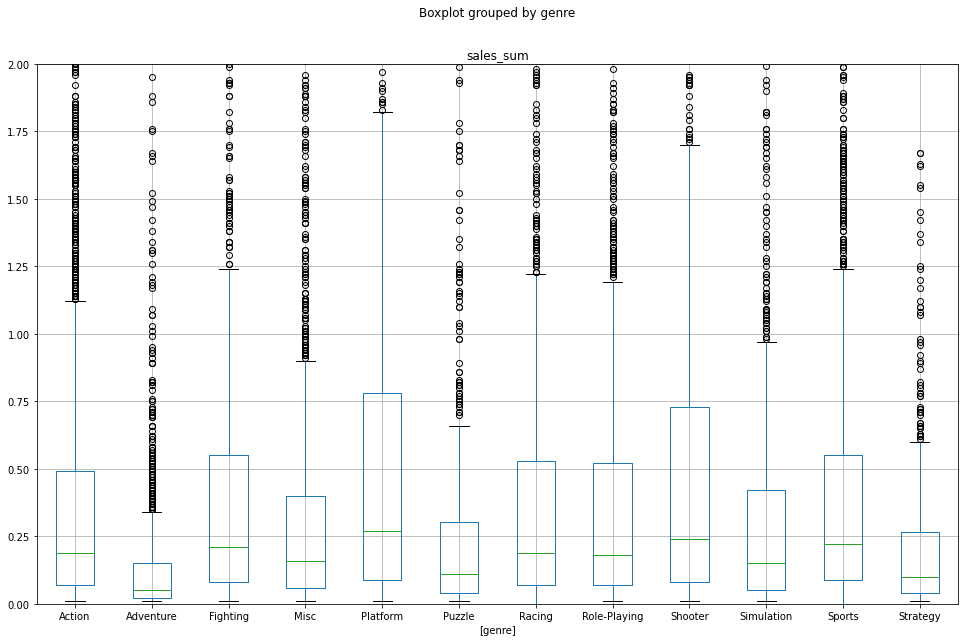

In [51]:
data.boxplot(column=['sales_sum'],by=['genre'],figsize=(16, 10))
plt.ylim([0, 2])
plt.show()

Жанр Action лидирует по общей прибыли среди жанров,но медианное значение выше в жанре platform и sports. Самое маленькое медианное значение у Adventure.

Вывод по 3 шагу
Были даны ответы на все поставленые вопросы и рассуждения подкреплены обоснованиями.

Обобщенный вывод на 2017 год ожидается подъем продаж по PS4, XOne и 3DS, так как уже многие студии-разработчики нашли применения своих техологий на этих платформах и хотят попасть на все рынки.

In [52]:
list_genre = data['genre'].unique()
list_genre    

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [53]:
data_mean = []

In [54]:

for genre in list_genre:
    print('Среднее значение для жанра ', genre)
    mean = data[data['genre'] == genre]['sales_sum'].mean()
    print(mean)
    
    

Среднее значение для жанра  Sports
0.566980408858603
Среднее значение для жанра  Platform
0.9321734234234234
Среднее значение для жанра  Racing
0.583402722177742
Среднее значение для жанра  Role-Playing
0.623871829105474
Среднее значение для жанра  Puzzle
0.4182241379310345
Среднее значение для жанра  Misc
0.45857714285714285
Среднее значение для жанра  Shooter
0.7955026455026455
Среднее значение для жанра  Simulation
0.4467010309278351
Среднее значение для жанра  Action
0.5177114870881567
Среднее значение для жанра  Fighting
0.5271260306242638
Среднее значение для жанра  Adventure
0.1823407521105142
Среднее значение для жанра  Strategy
0.255095168374817
Среднее значение для жанра  nan
nan


In [55]:
for genre in list_genre:
    print('Медианное значение для жанра ', genre)
    mean = data[data['genre'] == genre]['sales_sum'].median()
    print(mean)

Медианное значение для жанра  Sports
0.22000000000000003
Медианное значение для жанра  Platform
0.27
Медианное значение для жанра  Racing
0.19
Медианное значение для жанра  Role-Playing
0.18
Медианное значение для жанра  Puzzle
0.10999999999999999
Медианное значение для жанра  Misc
0.16
Медианное значение для жанра  Shooter
0.24
Медианное значение для жанра  Simulation
0.15000000000000002
Медианное значение для жанра  Action
0.19
Медианное значение для жанра  Fighting
0.21
Медианное значение для жанра  Adventure
0.05
Медианное значение для жанра  Strategy
0.09999999999999999
Медианное значение для жанра  nan
nan


# 4

In [56]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [57]:
data.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).head(5)

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


In [58]:
data.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).head(5)

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


In [59]:
data.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head(5)

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


В северной америке явно лидирует xbox и ps, можно предположиь что это связнаво с расположением компаний и влиянием определенной компании в каждом отдельном регионе. Также и в европе самыми популянрыми платформами остаются sony и microsoft. А вот в японии лидер сменяется на nintendo сос своими продуктами DS и 3DS, тоже зависит от расположении компании и взгяд на внутренний рынок, Nintendo базируется в японии. Но sony не так сильно отстает японского производителя.

In [60]:
data.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).head(5)

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


In [61]:
data.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).head(5)

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


In [62]:
data.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head(5)

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


В северной америке и в европе практически идентичны популярные жанр игр. В японии чуть популярный жанр игр Role-Playing. Но все завиисмотси от региона жанры Action и sports, всегда будут популярны.

In [63]:
data.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).head(5)

,na_sales
rating,
E,1292.99
T,759.75
M,748.48
E10+,353.32
K-A,2.56


In [64]:
data.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).head(5)

,eu_sales
rating,
E,710.25
M,483.97
T,427.03
E10+,188.52
AO,0.61


In [65]:
data.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head(5)

,jp_sales
rating,
E,198.11
T,151.40
M,64.24
E10+,40.20
K-A,1.46


У всех регионов очень схожи рейтинги. В основном рейтинг E(в целом подходит для всех возрастов) стоит на первом месте.Второе и третье место разменивают рейтинг T(в целом подходит для возраста 13 лет и старше) и M(17+). 

# 5

# 5.1

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются;

In [66]:
data_xone = data_2012[(data_2012['platform'] == 'XOne') & (data_2012['user_score'] > 0)]['user_score'] 

In [67]:
data_xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [68]:
data_pc = data_2012[(data_2012['platform'] == 'PC') & (data_2012['user_score'] > 0)]['user_score'] 

In [69]:
data_pc

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 155, dtype: float64

In [70]:
alpha = 0.05

In [71]:
results = st.ttest_ind(data_xone, data_pc)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.14012658403611647
Нет оснований отвергнуть нулевую гипотезу


Статистическо значимой разницы между средним пользователемским рейтингом Xbox One и PC нет

In [72]:
data_action = data_2012[(data_2012['genre'] == 'Action') & (data_2012['user_score'] > 0)]['user_score']

In [73]:
data_action

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 389, dtype: float64

In [74]:
data_sports = data_2012[(data_2012['genre'] == 'Sports') & (data_2012['user_score'] > 0)]['user_score']

In [75]:
data_sports

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16142    8.8
16146    6.9
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 160, dtype: float64

In [76]:
results = st.ttest_ind(data_action, data_sports)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Cредние пользовательские рейтинги жанров Action и Sports различаются

Вывод: Первая и вторая гипотезы не отвергнуты.

Платформа XOne старается из года в год набирать новых пользователей, чтобы соревноваться не только с PS4, но и с самой распространненной платформой на земле PC. На 2016 год по качеству игр они близки к компьютерным.

Различия между Action и Sports существуют из-за опыта создания игр. Первые экшены появились в 80х годах и из года в год они становятся интересней, так как им есть на что ровняться в прошлом. У спортивных игр в большинстве случаев ограничением в рейтингах стоит симуляция реальных спортивных игр. И любителям этой серии иногда приходиться сталкиваться с непонятными решениями в этих играх.

# 6 вывод

В ходе работы мы выполинли последовательно следующие шаги и выявили все самые интересные аномалии, гипотезы, популярные продукты и перспективные напрвления

- посмотрели данные, выявили некоторые аномалии и пропущенные значения
- провели предобработку данных, заполнили пропуски, удалили дубликаты, заменили название столбцов
- следующий шаг, анализ данных и подготовка всего самого свежего и интерсеного
- составили портрет пользователя каждого региона
- проверили гипотезы

Популярные компании конечно выбиваются из всего состава платформ, такие как sony, microsoft и Nintendo. В среднем, каждое новое выпущеннное устройство от таких компаний, живет на рынке 5-10 лет. Все это подкреплется актуальными играми, которые зараждают интрес к видеоиграм. Популярные жанры игр такие как: Action, Sports, Shooter, всегда остаются желаемыми в каждом регионе. То же касается платформ для игр - Мы должны выпускать игры для новых, перспективных платформ, так как цикл жизни одной платформы очень короткий. 

Перспективные платформы - PS4, XOne, 3DS. 
Но и не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.

Гипотезы: 
Статистическо значимой разницы между средним пользователемским рейтингом Xbox One и PC нет
Средние пользовательские рейтинги жанров Action и Sports различаются

Мир видеоплатформ и видеоигр тока растет, и все больше конкурецнии появляются у производителей.